In [1]:
import torch as th
import gzip
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
beta_1 = 1e-4
beta_T = 0.2

In [3]:
betas = th.linspace(beta_1, beta_T, steps=250)

In [4]:
alphas = 1 - betas
alphas_cum_prod = th.cumprod(alphas, dim=0)
sqrt_alphas_cum_prod = th.sqrt(alphas_cum_prod)
sqrt_minus_one_alphas_cum_prod = th.sqrt(1 - alphas_cum_prod)

In [5]:
(mnist_train, _), _ = pkl.load(gzip.open("../resources/mnist.pkl.gz", "rb"), encoding="bytes")

In [6]:
x_0 = th.from_numpy(mnist_train[0]).to(th.float) / 255.0

In [7]:
t = 60

In [8]:
noise = th.rand_like(x_0)

In [9]:
x_t = sqrt_alphas_cum_prod[t] * x_0 + sqrt_minus_one_alphas_cum_prod[t] * noise

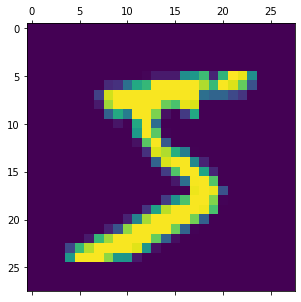

In [10]:
plt.matshow(x_0)

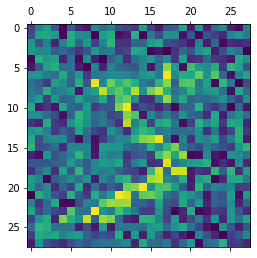

In [11]:
plt.matshow(x_t)

In [12]:
from music_diffusion_model.networks import Noiser, Denoiser

In [13]:
n = Noiser(250, 1e-4, 0.2)

In [14]:
o = n(x_0[None, None, :, :])

In [15]:
o.size()

torch.Size([1, 250, 1, 28, 28])

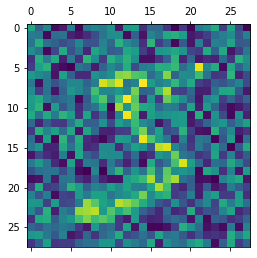

In [16]:
plt.matshow(o[0, t, 0])

In [17]:
d =Denoiser(1, 250, 8, 1e-4, 0.2)

In [18]:
x_0_d = d(o)

In [20]:
x_0_d.size()

torch.Size([1, 250, 1, 28, 28])